### Setup

apt install requirements

In [1]:
# !apt-get install -y \
#     libgl1-mesa-dev \
#     libgl1-mesa-glx \
#     libglew-dev \
#     libosmesa6-dev \
#     software-properties-common

# !apt-get install -y patchelf

Clone repo and install dependencies

In [2]:
# %cd /content

# ## TODO: use when repo is public
# # !git clone https://github.com/jannerm/diffuser.git
# ## backup for private repo
# !curl -L -o diffuser.zip https://www.dropbox.com/s/fe1scd8m2jf7zvj/diffuser.tar?dl=1
# !tar -xf diffuser.zip
# ## /TODO

# %cd diffuser
# %pip install -f https://download.pytorch.org/whl/torch_stable.html \
#                 typed-argument-parser \
#                 scikit-image==0.17.2 \
#                 scikit-video==1.1.11 \
#                 gitpython \
#                 einops \
#                 pillow \
#                 free-mujoco-py \
#                 gym \
#                 git+https://github.com/JannerM/d4rl.git@0e84a4d29db3ae501043215ce1d91843929f1949 \
#                 git+https://github.com/aravindr93/mjrl

# %pip install -e .

In [3]:
import os
import json
import numpy as np
from os.path import join
import pdb

from diffuser.guides.policies import Policy
import diffuser.datasets as datasets
import diffuser.utils as utils

/opt/conda/envs/diffuser/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pybullet build time: Nov 28 2023 23:51:11


In [4]:
os.chdir('/root/diffuser')

Arguments

In [5]:
savepath = 'logs/maze2d-large-v1/rollouts'
os.makedirs(savepath, exist_ok=True)
vis_freq = 10
batch_size = 1

Loading

In [19]:
dataset = 'maze2d-large-v1'

env = datasets.load_environment(dataset)

diffusion_experiment = utils.load_diffusion('logs_2', dataset, 'diffusion/H384_T256', epoch='latest')

diffusion = diffusion_experiment.ema
dataset = diffusion_experiment.dataset
renderer = diffusion_experiment.renderer

policy = Policy(diffusion, dataset.normalizer)

[ utils/serialization ] Loaded config from logs_2/maze2d-large-v1/diffusion/H384_T256/dataset_config.pkl

[utils/config ] Config: <class 'diffuser.datasets.sequence.GoalDataset'>
    env: maze2d-large-v1
    horizon: 384
    max_path_length: 40000
    normalizer: LimitsNormalizer
    preprocess_fns: ['maze2d_set_terminals']
    use_padding: False

[ utils/serialization ] Loaded config from logs_2/maze2d-large-v1/diffusion/H384_T256/render_config.pkl

[utils/config ] Config: <class 'diffuser.utils.rendering.Maze2dRenderer'>
    env: maze2d-large-v1

[ utils/serialization ] Loaded config from logs_2/maze2d-large-v1/diffusion/H384_T256/model_config.pkl

[utils/config ] Config: <class 'diffuser.models.temporal.TemporalUnet'>
    cond_dim: 4
    dim_mults: (1, 4, 8)
    horizon: 384
    transition_dim: 6

[ utils/serialization ] Loaded config from logs_2/maze2d-large-v1/diffusion/H384_T256/diffusion_config.pkl

[utils/config ] Config: <class 'diffuser.models.diffusion.GaussianDiffusion'>
  

load datafile: 100%|██████████| 8/8 [00:01<00:00,  7.39it/s]


[ utils/preprocessing ] Segmented maze2d-large-v1 | 1061 paths | min length: 67 | max length: 30470
[ datasets/buffer ] Finalized replay buffer | 1062 episodes
[ datasets/buffer ] Fields:
    actions: (1062, 40000, 2)
    infos/goal: (1062, 40000, 2)
    infos/qpos: (1062, 40000, 2)
    infos/qvel: (1062, 40000, 2)
    observations: (1062, 40000, 4)
    rewards: (1062, 40000, 1)
    terminals: (1062, 40000, 1)
    timeouts: (1062, 40000, 1)
    next_observations: (1062, 40000, 4)
    normed_observations: (1062, 40000, 4)
    normed_actions: (1062, 40000, 2)
[ models/temporal ] Channel dimensions: [(6, 32), (32, 128), (128, 256)]
[(6, 32), (32, 128), (128, 256)]

[ utils/serialization ] Loading model epoch: 1960000



Main Loop

In [20]:
from tqdm import tqdm

Resetting target


  0%|          | 0/5 [00:00<?, ?it/s]


                                                                                                    
1 / 256 [                                                            ]   0% | 102.7 Hz
t : 255
                                                                                                    
                                                                                                    
2 / 256 [                                                            ]   0% | 113.3 Hz
t : 254
                                                                                                    
                                                                                                    
3 / 256 [                                                            ]   1% | 117.7 Hz
t : 253
                                                                                                    
                                                                                                    
4 / 256

 20%|██        | 1/5 [00:09<00:39, 10.00s/it]

Saved 1 samples to: logs/maze2d-large-v1/rollouts/rollout.png
t: 781 | r: 1.00 |  R: 243.00 | score: 0.8841 | ref_max_score: 273.99 | ref_min_score: 6.7[-0.00096166 -0.00104619]
maze | pos: [7.06719005 8.97546155] | goal: [7.09510281 9.00582704]
t: 782 | r: 1.00 |  R: 244.00 | score: 0.8878 | ref_max_score: 273.99 | ref_min_score: 6.7[-0.00095182 -0.00103548]
maze | pos: [7.06747575 8.97577236] | goal: [7.09510281 9.00582704]
t: 783 | r: 1.00 |  R: 245.00 | score: 0.8915 | ref_max_score: 273.99 | ref_min_score: 6.7[-0.00094207 -0.00102489]
maze | pos: [7.06775851 8.97607998] | goal: [7.09510281 9.00582704]
t: 784 | r: 1.00 |  R: 246.00 | score: 0.8953 | ref_max_score: 273.99 | ref_min_score: 6.7[-0.00093243 -0.0010144 ]
maze | pos: [7.06803839 8.97638445] | goal: [7.09510281 9.00582704]
t: 785 | r: 1.00 |  R: 247.00 | score: 0.8990 | ref_max_score: 273.99 | ref_min_score: 6.7[-0.00092289 -0.00100401]
maze | pos: [7.06831539 8.97668581] | goal: [7.09510281 9.00582704]
t: 786 | r: 1.00 |

 40%|████      | 2/5 [00:22<00:34, 11.45s/it]

Saved 1 samples to: logs/maze2d-large-v1/rollouts/rollout.png
t: 781 | r: 1.00 |  R: 435.00 | score: 1.6024 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.43244458e-04 -2.16458085e-05]
maze | pos: [7.08804247 9.00519962] | goal: [7.09510281 9.00582704]
t: 782 | r: 1.00 |  R: 436.00 | score: 1.6061 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.40754814e-04 -2.14242603e-05]
maze | pos: [7.08811473 9.00520605] | goal: [7.09510281 9.00582704]
t: 783 | r: 1.00 |  R: 437.00 | score: 1.6099 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.38290651e-04 -2.12049797e-05]
maze | pos: [7.08818626 9.00521242] | goal: [7.09510281 9.00582704]
t: 784 | r: 1.00 |  R: 438.00 | score: 1.6136 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.35851709e-04 -2.09879434e-05]
maze | pos: [7.08825705 9.00521872] | goal: [7.09510281 9.00582704]
t: 785 | r: 1.00 |  R: 439.00 | score: 1.6173 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.33437730e-04 -2.07731286e-05]
maze | pos: [7.08832712 9.00522495] | goal: [7

 60%|██████    | 3/5 [00:36<00:25, 12.70s/it]

Saved 1 samples to: logs/maze2d-large-v1/rollouts/rollout.png
t: 781 | r: 1.00 |  R: 442.00 | score: 1.6286 | ref_max_score: 273.99 | ref_min_score: 6.7[-3.32836486e-05 -8.36358292e-05]
maze | pos: [7.09413671 9.00340032] | goal: [7.09510281 9.00582704]
t: 782 | r: 1.00 |  R: 443.00 | score: 1.6323 | ref_max_score: 273.99 | ref_min_score: 6.7[-3.29429853e-05 -8.27798034e-05]
maze | pos: [7.0941466  9.00342517] | goal: [7.09510281 9.00582704]
t: 783 | r: 1.00 |  R: 444.00 | score: 1.6361 | ref_max_score: 273.99 | ref_min_score: 6.7[-3.26058087e-05 -8.19325393e-05]
maze | pos: [7.09415638 9.00344976] | goal: [7.09510281 9.00582704]
t: 784 | r: 1.00 |  R: 445.00 | score: 1.6398 | ref_max_score: 273.99 | ref_min_score: 6.7[-3.22720832e-05 -8.10939470e-05]
maze | pos: [7.09416607 9.0034741 ] | goal: [7.09510281 9.00582704]
t: 785 | r: 1.00 |  R: 446.00 | score: 1.6435 | ref_max_score: 273.99 | ref_min_score: 6.7[-3.19417734e-05 -8.02639378e-05]
maze | pos: [7.09417566 9.00349819] | goal: [7

 80%|████████  | 4/5 [00:52<00:13, 13.93s/it]

Saved 1 samples to: logs/maze2d-large-v1/rollouts/rollout.png
t: 781 | r: 1.00 |  R: 436.00 | score: 1.6061 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.46224138e-05 -7.55995148e-05]
maze | pos: [7.09438811 9.00363358] | goal: [7.09510281 9.00582704]
t: 782 | r: 1.00 |  R: 437.00 | score: 1.6099 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.43703996e-05 -7.48257420e-05]
maze | pos: [7.09439542 9.00365604] | goal: [7.09510281 9.00582704]
t: 783 | r: 1.00 |  R: 438.00 | score: 1.6136 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.41209648e-05 -7.40598889e-05]
maze | pos: [7.09440266 9.00367827] | goal: [7.09510281 9.00582704]
t: 784 | r: 1.00 |  R: 439.00 | score: 1.6173 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.38740829e-05 -7.33018744e-05]
maze | pos: [7.09440983 9.00370027] | goal: [7.09510281 9.00582704]
t: 785 | r: 1.00 |  R: 440.00 | score: 1.6211 | ref_max_score: 273.99 | ref_min_score: 6.7[-2.36297280e-05 -7.25516183e-05]
maze | pos: [7.09441692 9.00372205] | goal: [7

100%|██████████| 5/5 [01:09<00:00, 13.98s/it]

Saved 1 samples to: logs/maze2d-large-v1/rollouts/rollout.png
t: 791 | r: 1.00 |  R: 449.00 | score: 1.6548 | ref_max_score: 273.99 | ref_min_score: 6.7[ 1.60173681e-05 -7.14453968e-05]
maze | pos: [7.0955677  9.00375416] | goal: [7.09510281 9.00582704]
t: 792 | r: 1.00 |  R: 450.00 | score: 1.6585 | ref_max_score: 273.99 | ref_min_score: 6.7[ 1.58534278e-05 -7.07141420e-05]
maze | pos: [7.09556294 9.00377538] | goal: [7.09510281 9.00582704]
t: 793 | r: 1.00 |  R: 451.00 | score: 1.6622 | ref_max_score: 273.99 | ref_min_score: 6.7[ 1.56911655e-05 -6.99903718e-05]
maze | pos: [7.09555823 9.00379639] | goal: [7.09510281 9.00582704]
t: 794 | r: 1.00 |  R: 452.00 | score: 1.6660 | ref_max_score: 273.99 | ref_min_score: 6.7[ 1.55305640e-05 -6.92740094e-05]
maze | pos: [7.09555357 9.00381718] | goal: [7.09510281 9.00582704]
t: 795 | r: 1.00 |  R: 453.00 | score: 1.6697 | ref_max_score: 273.99 | ref_min_score: 6.7[ 1.53716063e-05 -6.85649792e-05]
maze | pos: [7.09554896 9.00383776] | goal: [7

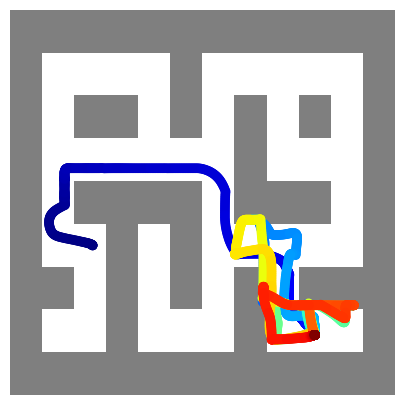

In [21]:
observation = env.reset()
isconditioned = True

if isconditioned:
    print('Resetting target')
    env.set_target()

## set conditioning xy position to be the goal
target = env._target
cond = {
    diffusion.horizon - 1: np.array([*target, 0, 0]),
}

## observations for rendering
rollout = [observation.copy()]

total_reward = 0
scorelist = []
for i in tqdm(range(5)):
    total_reward = 0
    for t in range(env.max_episode_steps):

        state = env.state_vector().copy()

        ## can replan if desired, but the open-loop plans are good enough for maze2d
        ## that we really only need to plan once
        if t == 0:
            cond[0] = observation

            action, samples = policy(cond, batch_size=batch_size)
            actions = samples.actions[0]
            sequence = samples.observations[0]
        # pdb.set_trace()

        # ####
        if t < len(sequence) - 1:
            next_waypoint = sequence[t+1]
        else:
            next_waypoint = sequence[-1].copy()
            next_waypoint[2:] = 0
            # pdb.set_trace()

        ## can use actions or define a simple controller based on state predictions
        action = next_waypoint[:2] - state[:2] + (next_waypoint[2:] - state[2:])
        # pdb.set_trace()
        ####

        # else:
        #     actions = actions[1:]
        #     if len(actions) > 1:
        #         action = actions[0]
        #     else:
        #         # action = np.zeros(2)
        #         action = -state[2:]
        #         pdb.set_trace()



        next_observation, reward, terminal, _ = env.step(action)
        total_reward += reward
        score = env.get_normalized_score(total_reward)
        print(
            f't: {t} | r: {reward:.2f} |  R: {total_reward:.2f} | score: {score:.4f} | ref_max_score: {env.ref_max_score} | ref_min_score: {env.ref_min_score}'
            f'{action}'
        )

        xy = next_observation[:2]
        goal = env.unwrapped._target
        print(f'maze | pos: {xy} | goal: {goal}')

        ## update rollout observations
        rollout.append(next_observation.copy())

        # logger.log(score=score, step=t)

        if t % vis_freq == 0 or terminal:
            fullpath = join(savepath, f'{t}.png')

            if t == 0: renderer.composite(fullpath, samples.observations, ncol=1)



            ## save rollout thus far
            renderer.composite(join(savepath, 'rollout.png'), np.array(rollout)[None], ncol=1)



        if terminal:
            break

        observation = next_observation
    scorelist.append((total_reward, score)) 

In [22]:
scorelist

[(261.0, 0.9514010999289161),
 (453.0, 1.6697220247671067),
 (460.0, 1.6959108084851657),
 (454.0, 1.6734632795839723),
 (457.0, 1.6846870440345691)]

In [18]:
print("logs/pretrained/maze2d-large-v1")
np.mean([s[0] for s in scorelist]), np.std([s[0] for s in scorelist]), np.mean([s[1]*100 for s in scorelist]), np.std([s[1]*100 for s in scorelist])

logs/pretrained/maze2d-large-v1


(463.0, 24.306377763870945, 170.71345729357625, 9.093635288963647)

In [12]:
print("logs/maze2d-large-v1")
np.mean([s[0] for s in scorelist]), np.std([s[0] for s in scorelist]), np.mean([s[1]*100 for s in scorelist]), np.std([s[1]*100 for s in scorelist])

logs/maze2d-large-v1


(459.8, 9.947864092356712, 169.51625575217926, 3.721749445305367)

In [23]:
print("logs_2/maze2d-large-v1")
np.mean([s[0] for s in scorelist]), np.std([s[0] for s in scorelist]), np.mean([s[1]*100 for s in scorelist]), np.std([s[1]*100 for s in scorelist])

logs_2/maze2d-large-v1


(417.0, 78.03845206050669, 153.5036851359946, 29.1961734672104)

In [12]:
np.std([s[1] for s in scorelist])

21.95702474131786

In [ ]:
json_path = join(savepath, 'rollout.json')
json_data = {'score': score, 'step': t, 'return': total_reward, 'term': terminal,
    'epoch_diffusion': diffusion_experiment.epoch}
json.dump(json_data, open(json_path, 'w'), indent=2, sort_keys=True)

In [ ]:
json_data

{'score': 1.6210857121478544,
 'step': 799,
 'return': 440.0,
 'term': False,
 'epoch_diffusion': 1960000}

In [ ]:
json_data

{'score': 1.3367503460660706,
 'step': 799,
 'return': 364.0,
 'term': False,
 'epoch_diffusion': 1960000}

In [ ]:
print('Ref min score:', env.ref_min_score, 'Ref max score:', env.ref_max_score)

Ref min score: 6.7 Ref max score: 273.99


In [ ]:
json_data

{'score': 1.6173444573309887,
 'step': 799,
 'return': 439.0,
 'term': False,
 'epoch_diffusion': 1960000}

In [28]:
100*(439.0-env.ref_min_score)/(env.ref_max_score - env.ref_min_score)

161.73444573309888

In [ ]:
print('Ref min score:', env.ref_min_score, 'Ref max score:', env.ref_max_score)

Ref min score: 6.7 Ref max score: 273.99


In [ ]:
print('Ref min score:', env.ref_min_score, 'Ref max score:', env.ref_max_score)

Ref min score: 6.7 Ref max score: 273.99


In [15]:
import json
import numpy as np

In [20]:
metrics = {}

In [21]:
datasets = ['maze2d-large-v1', 'maze2d-medium-v1', 'maze2d-umaze-v1']

In [22]:
for dataset in datasets:
    json_path = f'/root/diffuser/logs/pretrained/{dataset}/rollouts/scorelist.json'
    with open(json_path, 'r') as f:
        data = json.load(f)
    scores = np.array(data['scores'])
    metrics.update({dataset: {'mean': np.mean(scores), 'std': np.std(scores)}})


In [24]:
with open('/root/diffuser/logs/pretrained/metrics.json', 'w') as f:
    json.dump(metrics, f, indent=2)

In [25]:
dataset = 'maze2d-large-v1'
json_path = f'/root/diffuser/logs/pretrained/{dataset}/rollouts/scorelist.json'
with open(json_path, 'r') as f:
    data = json.load(f)
scores = np.array(data['scores'])

In [27]:
scores

array([170.33933181, 162.4826967 , 161.36032025, 154.2519361 ,
       160.61206929, 160.61206929, 161.73444573, 161.36032025,
       161.36032025,  -2.50664073, 160.98619477, 162.10857121,
       167.34632796,  -2.50664073, 160.98619477,  -2.50664073,
       163.97919862, 160.23794381, 159.86381832, 159.86381832,
       172.5840847 , 162.85682218, 160.98619477, 162.4826967 ,
       120.95476823, 160.98619477,  -2.50664073, 160.98619477,
        92.8953571 , 163.23094766, 155.37431254, 133.67503461,
       160.61206929, 161.73444573, 155.00018706, 162.4826967 ,
       113.4722586 , 159.48969284, 111.97575667, 159.86381832,
        -2.50664073, 157.99319092, 160.61206929, 163.23094766,
       161.73444573, 160.61206929, 160.98619477,  -2.50664073,
       160.23794381, 169.96520633, 161.73444573, 160.98619477,
       160.98619477, 183.43372367, 161.73444573,  -2.50664073,
        94.76598451, 155.00018706, 155.74843803, 162.4826967 ,
       174.82883759, 162.85682218, 161.36032025, 161.36